In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import stats
from scipy.misc.pilutil import imread

In [6]:
meta = pd.read_csv("aggregate_clean.csv")

In [7]:
meta.head()

,Date,Time,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,avg_kill_distance
0,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,170.954788,0,0,Satch,186.999,100004,79,0.000000
1,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,66.545590,0,0,osamabinlaggon,124.782,100005,87,0.000000
2,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,728.722656,610.168945,124,0,dengboyu76,839.161,100006,35,0.000000
3,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,2646.184000,1431.292000,24,0,GOGingmimi,751.716,100007,46,0.000000
4,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,723.102300,100,1,AtomicBrunette,744.088,100011,47,1863.379202


In [8]:
s = meta['team_placement'].apply(lambda x: 1 if x <= 10 else 0)
meta['Target'] = s.apply(lambda x: x)
#df['right'] = s.apply(lambda x: x[1])

In [10]:
meta

,Date,Time,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,avg_kill_distance,Target
0,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,170.954788,0,0,Satch,186.999,100004,79,0.000000,0
1,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,66.545590,0,0,osamabinlaggon,124.782,100005,87,0.000000,0
2,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,728.722656,610.168945,124,0,dengboyu76,839.161,100006,35,0.000000,0
3,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,2646.184000,1431.292000,24,0,GOGingmimi,751.716,100007,46,0.000000,0
4,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,723.102300,100,1,AtomicBrunette,744.088,100011,47,1863.379202,0
5,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,0.000000,0,0,MIUI6,108.231,100013,90,0.000000,0
6,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,1055.677610,1889.028000,438,4,LORD_JTR,1006.527,100022,29,2450.417527,0
7,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,927.809937,0,0,DongMing1986,741.473,100026,48,0.000000,0
8,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,706.727400,0,0,Prima_Top,290.769,100031,67,0.000000,0
9,2017-11-19,08:28:59,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,171.162720,0,0,xxfffffff,337.259,100033,63,0.000000,0


In [13]:
data = pd.concat([meta.loc[:,'player_dist_ride':'player_kills'],meta.loc[:,'player_survive_time'],meta.loc[:,'avg_kill_distance'],meta.loc[:,'Target']],axis=1)

In [14]:
data

,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,avg_kill_distance,Target
0,0.000000,170.954788,0,0,186.999,0.000000,0
1,0.000000,66.545590,0,0,124.782,0.000000,0
2,728.722656,610.168945,124,0,839.161,0.000000,0
3,2646.184000,1431.292000,24,0,751.716,0.000000,0
4,0.000000,723.102300,100,1,744.088,1863.379202,0
5,0.000000,0.000000,0,0,108.231,0.000000,0
6,1055.677610,1889.028000,438,4,1006.527,2450.417527,0
7,0.000000,927.809937,0,0,741.473,0.000000,0
8,0.000000,706.727400,0,0,290.769,0.000000,0
9,0.000000,171.162720,0,0,337.259,0.000000,0


In [15]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = stats.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

In [16]:
def randomSplitCI(data, clf, num_run, **params):
    """
    INPUT
        data: 2D numpy array. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        num_run: int. How many times you want to run for random evaluation?
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_scores: list. Results of trails
        test_scores: list. Results of trails
        train_mean: scalar. Average accuracy
        test_mean: scalar. Average accuracy
        train_ci: scalar. Confidence Interval
        test_ci: scalar. Confidence Interval
    """
    
    ########### your code goes here ###########
    if clf == 'LR':
        clf = LogisticRegression(C=params["c"])#add if statement to account for SVM and NB
    else:
        clf = GaussianNB()
    #clf.set_params(**params)
    train_scores = []
    test_scores = []
    
    
    for i in range (0,num_run):
        np.random.permutation(data)
        features = data.iloc[:,:data.columns.get_loc("Target")-1].as_matrix()
        target = data['Target'].as_matrix()
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
        clfModel = clf.fit(features_train, target_train)
        target_pred = clfModel.predict(features_test)
        train_pred = clfModel.predict(features_train)
        #pd.DataFrame(metrics.confusion_matrix(target_test, target_pred), columns=labels, index=labels)
        test_scores.append(metrics.accuracy_score(target_test, target_pred))
        train_scores.append(metrics.accuracy_score(target_train, train_pred))
        #print(test_scores)
    train_mean, train_ci = mean_confidence_interval(train_scores)
    test_mean, test_ci = mean_confidence_interval(test_scores)
    ###########         end         ###########
    return train_scores, test_scores, train_mean, test_mean, train_ci, test_ci

In [17]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
    )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
    )

Train    
Result of trails:[0.87470030743634397, 0.8710488195588354, 0.87140364330623221, 0.87083533740774366, 0.87622150555255685, 0.87011270706268284, 0.87104673740360383, 0.86665902393216976, 0.87080998410580679, 0.8714583917408496]     
Average Accuracy: 0.8714296457506825     
Confidence Interval: 0.00139433096040642

Test    
Result of trails:[0.87482631357237617, 0.8709979246222338, 0.87096448766290513, 0.87056953144245897, 0.87596431333345903, 0.87013799461693531, 0.87113938868093199, 0.86671627911230298, 0.8710127854930465, 0.87129228417871685]     
Average Accuracy: 0.8713621302715368     
Confidence Interval: 0.0013726758802973993


In [30]:
def hyperParameterAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
    
    OUTPUT
        test_mean_hp: list.  mean accuracy list of test
        test_ci_hp: list. confidence interval list of test
        train_mean_hp: list. mean accuracy list of train
        train_ci_hp: list. confidence interval list of train
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """

    ########### your code goes here ###########
    params = np.logspace(-8, 2, num=11)
    test_mean_hp = []
    test_ci_hp = []
    train_mean_hp = []
    train_ci_hp = []
    for x in params:
   #data.columns.get_loc("target")-1* feature_percentage[x] 
        train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, clf, num_run,c = x)
        train_mean_hp.append(train_mean)
        train_ci_hp.append(train_ci)
        test_mean_hp.append(test_mean)
        test_ci_hp.append(test_ci)
        print(str(x) + " done.")
 
    
    ###########         end         ###########
    return train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp

In [31]:
train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp = hyperParameterAC(data, 'LR', 10)

1e-08 done.
1e-07 done.
1e-06 done.
1e-05 done.
0.0001 done.
0.001 done.
0.01 done.
0.1 done.
1.0 done.
10.0 done.
100.0 done.


In [32]:
def hyperParameterPlot(params, train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(params, test_mean_hp, color=sns.xkcd_rgb["pale red"], yerr=test_ci_hp)
    train_curve=plt.errorbar(params, train_mean_hp,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_hp)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Parameter')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Parameters")
    plt.show()

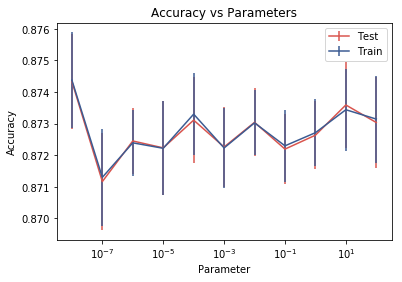

In [34]:
hyperParameterPlot(np.logspace(-8, 2, num=11),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )